In [307]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

In [308]:
# Load nodes from a Pandas DataFrame
# Example DataFrame with columns X, Y, Z, Atom_Name, Residue_Name, Residue_ID, Atom_Type, and Timeframe
# Load nodes for all timesteps
filepath = '/home/mhanowar/Downloads/dataframe100frames.csv'  # Replace with the actual file path
df = pd.read_csv(filepath)




df

,X,Y,Z,Atom_Name,Residue_Name,Residue_ID,Atom_Type,Timeframe
0,8.552608,-3.780222,24.871099,C1,CSP,1,cb,0
1,7.627723,-2.706018,24.194902,C2,CSP,1,cb,0
2,8.433088,-1.527206,23.636011,C3,CSP,1,cb,0
3,9.516163,-0.981908,24.624325,C4,CSP,1,cb,0
4,10.270212,-2.072471,25.126463,O5,CSP,1,ob,0
...,...,...,...,...,...,...,...,...
612595,55.141541,40.359180,62.566158,H8,SFL,14,ha,99
612596,54.749958,38.151661,63.805187,H9,SFL,14,ha,99
612597,51.592831,40.077057,72.086899,H10,SFL,14,ha,99
612598,47.972420,39.918854,69.783325,H11,SFL,14,ha,99


In [309]:
# subset of data
atom_types = ['o', 'os', 'n', 'hn']
df= df.query('Atom_Type in @atom_types').reset_index(drop=True)

# df = df[(df['Residue_ID'].isin([1, 10, 11, 12, 13, 14])) & (df['Timeframe'] <= 10)]

In [310]:
# Merge 'Atom_Name' and 'Residue_ID' into 'Node'
df['Node'] = df['Atom_Name'].astype(str) + '_' + df['Residue_ID'].astype(str)

# Drop unnecessary columns
columns_to_drop = ['Atom_Name', 'Residue_Name', 'Residue_ID', 'Atom_Type']
df = df.drop(columns=columns_to_drop)

# Sorting the DataFrame based on the 'Node' column
df = df.sort_values(by='Node')

# Print the modified DataFrame
print("Modified DataFrame Shape:", df.shape)
print(df)

# # Your dataset
# data = {
#     'X': [10.847510, 12.441049, 11.649165, 7.650953],
#     'Y': [-3.840538, -2.132687, -2.592921, -0.410268],
#     'Z': [27.752209, 27.330761, 29.447174, 23.051884],
#     'Timeframe': [0, 0, 1, 1],
#     'Node': ['O8_1', 'O10_1', 'O8_1', 'O10_1']
# }

# # Create a DataFrame
# df = pd.DataFrame(data)

Modified DataFrame Shape: (88400, 5)
               X         Y          Z  Timeframe    Node
25806   9.597869  2.942067  31.569969         29  H103_1
75310   8.926670  3.424206  31.639782         85  H103_1
26690   8.972098  3.365131  31.678024         30  H103_1
66470   8.738058  3.454309  31.555746         75  H103_1
67354   8.845688  3.981585  31.690811         76  H103_1
...          ...       ...        ...        ...     ...
31607  71.065826  9.190027  29.502651         35   O98_4
17463  70.441620  9.141562  28.718157         19   O98_4
1551   70.879860  9.034083  28.953461          1   O98_4
11275  71.166382  8.930011  29.432276         12   O98_4
43983  70.573975  9.133989  28.709064         49   O98_4

[88400 rows x 5 columns]


In [311]:


# Function to calculate Euclidean distance between two nodes
def calculate_distance(node1, node2):
    return np.linalg.norm(node1 - node2)

# Function to create edges within a distance threshold
def create_edges_within_threshold(nodes, node_names, threshold):
    edges = []
    num_nodes = len(nodes)
    for i, j in combinations(range(num_nodes), 2):
        node1, node2 = nodes[i], nodes[j]
        distance = calculate_distance(node1, node2)
        if distance <= threshold:
            edges.append((node_names[i], node_names[j], distance))
    return edges



In [312]:
# Number of timesteps
# num_timesteps = df_nodes['Timeframe'].nunique()
num_timesteps = 10
# Specify the distance threshold
distance_threshold = 3  # You can adjust this threshold as needed

In [313]:
df_filtered = df[df['Timeframe'] <= num_timesteps]

# Create edges for each timeframe
all_edges = []
for timeframe, group in df_filtered.groupby('Timeframe'):
    nodes = group[['X', 'Y', 'Z']].values
    node_names = group['Node'].values
    edges = create_edges_within_threshold(nodes, node_names, distance_threshold)
    all_edges.extend([(timeframe, edge[0], edge[1], edge[2]) for edge in edges])

# Create DataFrame for edges
columns = ['Timeframe', 'Node1', 'Node2', 'Edge_Dist']
df = pd.DataFrame(all_edges, columns=columns)
df = df.sort_values(by=['Node1', 'Timeframe']).reset_index(drop=True)
df['Edge_Index'] = df.index
df = df[['Edge_Index', 'Node1', 'Node2', 'Edge_Dist', 'Timeframe']]
df


,Edge_Index,Node1,Node2,Edge_Dist,Timeframe
0,0,H103_1,N123_1,1.013001,0
1,1,H103_1,O120_1,2.276632,0
2,2,H103_1,O54_1,2.216071,0
3,3,H103_1,N123_1,1.013000,1
4,4,H103_1,O120_1,2.319315,1
...,...,...,...,...,...
14044,14044,O96_4,O98_4,2.291878,6
14045,14045,O96_4,O98_4,2.253654,7
14046,14046,O96_4,O98_4,2.220802,8
14047,14047,O96_4,O98_4,2.287188,9


In [314]:
df.to_csv('continuous_edge.csv', index=False)

In [315]:
df.head(10)

,Edge_Index,Node1,Node2,Edge_Dist,Timeframe
0,0,H103_1,N123_1,1.013001,0
1,1,H103_1,O120_1,2.276632,0
2,2,H103_1,O54_1,2.216071,0
3,3,H103_1,N123_1,1.013000,1
4,4,H103_1,O120_1,2.319315,1
5,5,H103_1,O54_1,2.197912,1
6,6,H103_1,N123_1,1.013000,2
7,7,H103_1,O120_1,2.373854,2
8,8,H103_1,O54_1,2.331444,2
9,9,H103_1,N123_1,1.013000,3


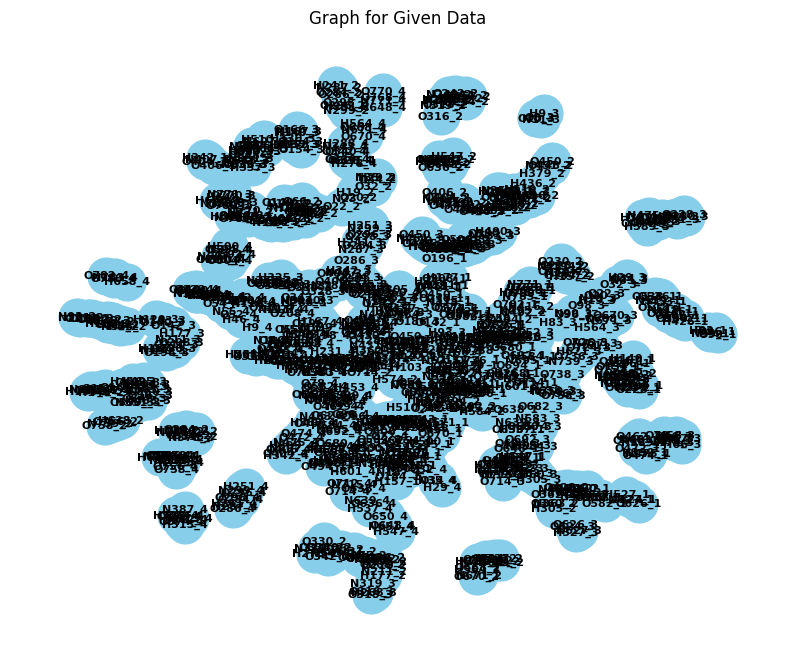

In [316]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# # Creating the DataFrame
# data = {
#     'Edge_Index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'Node1': ['H103_1', 'H103_1', 'H103_1', 'H103_1', 'H103_1', 'H103_1', 'H103_1', 'H103_1', 'H103_1', 'H103_1', 'N123_1'],
#     'Node2': ['N123_1', 'O120_1', 'O54_1', 'N123_1', 'O120_1', 'O54_1', 'N123_1', 'O120_1', 'O54_1', 'N123_1', 'O120_1'],
#     'Edge_Dist': [1.013001, 2.276632, 2.216071, 1.013000, 2.319315, 2.197912, 1.013000, 2.373854, 2.331444, 1.013000, 2.2419],
#     'Timeframe': [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 0]
# }


# df = pd.DataFrame(data)

# Create a graph
G = nx.from_pandas_edgelist(df, 'Node1', 'Node2', ['Edge_Dist'])

# Plot the graph
pos = nx.spring_layout(G)
edge_colors = df['Edge_Dist'].apply(lambda x: plt.cm.Blues(x / df['Edge_Dist'].max()))

fig, ax = plt.subplots(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black',
        font_size=8, edge_color=edge_colors, width=2, ax=ax)

plt.title('Graph for Given Data')
plt.show()
